In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('_mpl-gallery')

## importing Data

In [243]:
df = pd.read_csv('movies.csv')

In [244]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# check for duplicates

In [245]:
df.duplicated().sum()

0

# check for null values

In [246]:
for n in df.columns:
    s = df[n].isna().sum() / df[n].shape[0] *100
    print(f'{n} '"{:.2f}%".format(s))

name 0.00%
rating 1.00%
genre 0.00%
year 0.00%
released 0.03%
score 0.04%
votes 0.04%
director 0.00%
writer 0.04%
star 0.01%
country 0.04%
budget 28.31%
gross 2.46%
company 0.22%
runtime 0.05%


# Handle with nulls

Delete null values from columns where total of null values less than 4% .

In [247]:
for n in df.columns:
    s = df[n].isna().sum() / df[n].shape[0] *100
    if s < 4:
        df.dropna(subset = n , inplace = True)

Deleting column (budget) because have 28% null values

In [248]:
df.drop(columns = 'budget',axis=0 , inplace = True)

# check data Types

In [249]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
gross       float64
company      object
runtime     float64
dtype: object

# check the float values if should change to intger

In [250]:
df[df.runtime.astype('str').str[-1] != '0']

,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime


 changing data type from float to int

In [251]:
df['votes'] = df.votes.astype('int64')
df['gross'] = df.gross.astype('int64')
df['runtime'] = df.runtime.astype('int64')

# correcting value . 

in column rating there is value (Not Rated) & (not rated) we correct one of them

In [252]:
df.rating.unique()

array(['R', 'PG', 'G', 'Not Rated', 'NC-17', 'Approved', 'PG-13',
       'Unrated', 'X', 'TV-PG', 'TV-MA', 'TV-14'], dtype=object)

In [253]:
df['rating'] = df.rating.replace('Not Rated', 'Unrated')

in column genre there is value (Music) & (Musical) we correct one of them

In [254]:
df['genre'] = df.genre.replace('Music','Musical')

# correlation

In [255]:
cor =df.corr()

C:\Users\0642555346\AppData\Local\Temp\ipykernel_7560\2301604919.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor =df.corr()


<Axes: >

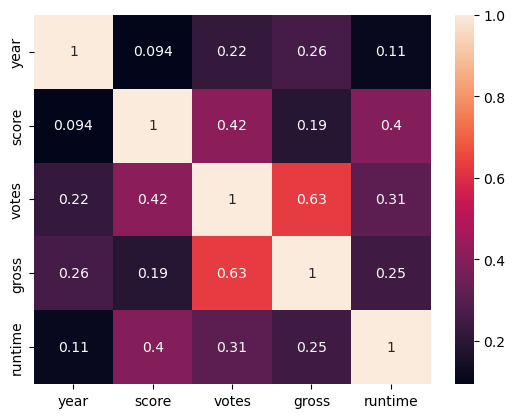

In [256]:
sns.heatmap(cor , annot = True)

In [278]:
df_normalized = df.copy()

In [279]:
for n in df_normalized.columns:
    if df_normalized[n].dtype == 'object':
        df_normalized[n] = df_normalized[n].astype('category').cat.codes

In [280]:
df_normalized_corr = df_normalized.corr()


In [264]:
df_normalized_corr = df_normalized_corr.unstack()
df_normalized_corr = df_normalized_corr[(df_normalized_corr.values > 0.4) & (df_normalized_corr.values != 1)]

In [281]:
df_normalized_corr

,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime
name,1.000000,-0.007946,0.018267,0.008987,-0.010012,0.014970,0.011462,0.010575,0.009451,0.006731,-0.012544,0.005135,0.008529,0.009563
rating,-0.007946,1.000000,0.161698,0.127820,0.023978,0.124072,-0.053555,-0.003090,0.009459,0.020532,-0.203286,-0.179453,-0.124529,0.158367
genre,0.018267,0.161698,1.000000,-0.084831,0.027676,0.045920,-0.150047,-0.015461,0.009955,-0.000607,-0.029658,-0.244663,-0.072764,-0.041439
year,0.008987,0.127820,-0.084831,1.000000,0.001440,0.093951,0.218941,-0.021394,-0.011853,-0.031476,-0.080122,0.258826,-0.015880,0.114237
released,-0.010012,0.023978,0.027676,0.001440,1.000000,0.044469,0.018211,-0.003460,-0.004121,0.017597,-0.020491,0.001084,-0.006299,-0.000472
score,0.014970,0.124072,0.045920,0.093951,0.044469,1.000000,0.415190,0.008358,0.019710,-0.001386,-0.126497,0.188071,-0.000342,0.397226
votes,0.011462,-0.053555,-0.150047,0.218941,0.018211,0.415190,1.000000,0.000260,0.000323,-0.022542,0.066907,0.631110,0.128127,0.309945
director,0.010575,-0.003090,-0.015461,-0.021394,-0.003460,0.008358,0.000260,1.000000,0.297126,0.036188,0.012726,-0.014296,0.001379,0.015713
writer,0.009451,0.009459,0.009955,-0.011853,-0.004121,0.019710,0.000323,0.297126,1.000000,0.024161,0.012415,-0.024021,0.003462,-0.004668
star,0.006731,0.020532,-0.000607,-0.031476,0.017597,-0.001386,-0.022542,0.036188,0.024161,1.000000,-0.018838,-0.002451,0.005417,0.007827


<Axes: >

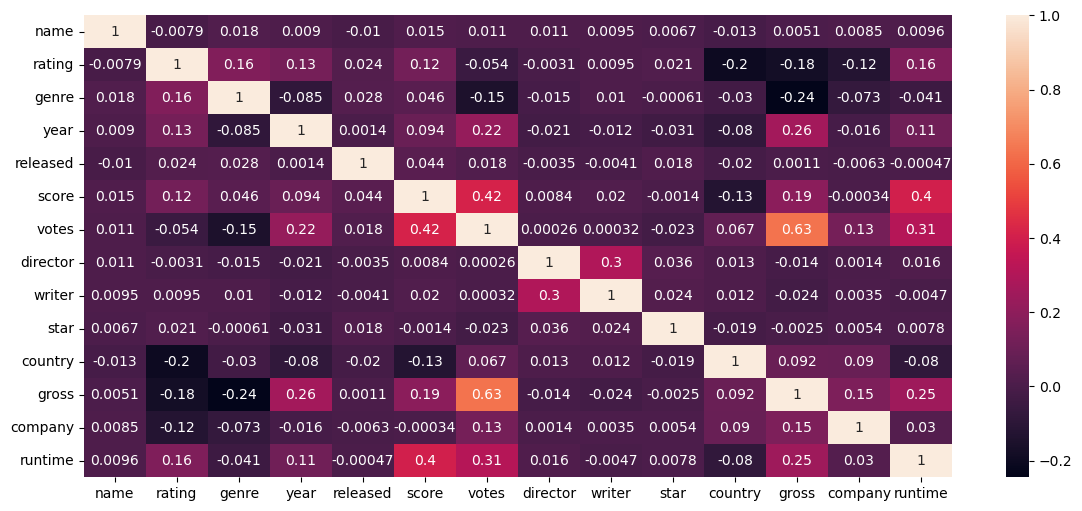

In [286]:
plt.figure(figsize = (14,6))
sns.heatmap(df_normalized_corr , annot = True)

In [288]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,39846344,Orion Pictures,98


# Number of movies by each country

In [343]:
country = df.country.value_counts()
country['other'] = 0

In [364]:
for n , i in zip(country , country.index):
    if( n < 100) & (i != 'other'):
        country['other'] += n
        country.drop(i,inplace=True)
country

United States     5358
United Kingdom     790
France             255
Canada             181
Germany            114
other              714
Name: country, dtype: int64

C:\Users\0642555346\AppData\Local\Temp\ipykernel_7560\1701873468.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(top_country.index ,rotation=45)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


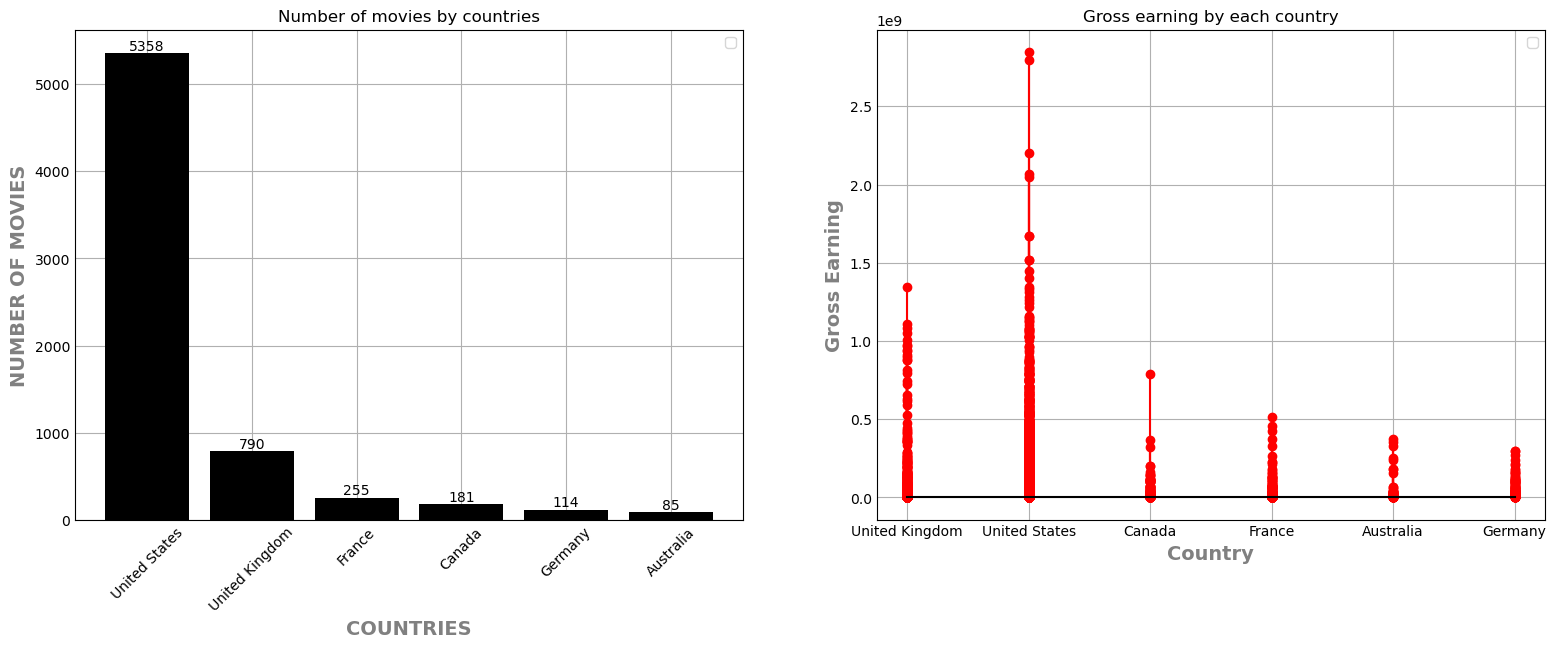

In [490]:

top_country = df.country.value_counts().nlargest(6)
f , ax = plt.subplots(nrows= 1, ncols= 2 , figsize= (15,5))

label_font = {'fontsize': 14, 'fontweight': 'bold', 'color': 'grey'}


for i , j in zip(top_country.index , top_country.values):
    ax[0].text(i,j,str(j),va='bottom' , ha='center')

ax[0].bar(top_country.index , top_country.values , color='black')
ax[0].set_xticklabels(top_country.index ,rotation=45)
ax[0].set_title('Number of movies by countries')
ax[0].set_xlabel('COUNTRIES', label_font)
ax[0].set_ylabel('NUMBER OF MOVIES' , label_font)
ax[0].legend()

country_scat = df[['country','gross']][df.country.isin(top_country.index)]
ax[1].stem(country_scat.country  ,country_scat.gross , linefmt='red' )
#ax[1].set_xticklabels(top_country.index ,rotation=45)
ax[1].set_title('Gross earning by each country')
ax[1].set_xlabel('Country', label_font)
ax[1].set_ylabel('Gross Earning' , label_font)


ax[1].legend()
plt.show()